# Ford GoBike System Data

Each trip is anonymized and includes:

(Represented in chorological order of the table) <br>
1. Trip Duration (seconds)
2. Start Time and Date
3. End Time and Date
4. Start Station ID
5. Start Station Name
6. Start Station Latitude
7. Start Station Longitude
8. End Station ID
9. End Station Name
10. End Station Latitude
11. End Station Longitude
12. Bike ID
13. User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb 
import datetime

# from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
# import geopandas as gpd # To create GeodataFrame
# from geopandas import GeoDataFrame

## Gather Data

In [5]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

## Assess Data

In [6]:
#Check the number of rows and column
df.shape

(519700, 13)

In [7]:
#Display the dataset
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [8]:
#Check for the datatype and number of entries for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [9]:
#Check for any abnormilties using the describe method
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [10]:
#Check for null values
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [11]:
#Check for any duplicated rows 
df.duplicated().sum()

0

## Clean Data

In [12]:
df["start_time"] = pd.to_datetime(df["start_time"])
df["end_time"] = pd.to_datetime(df["end_time"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [14]:
#Extract day_name of the week from time
df["start_day_week"] = df["start_time"].dt.day_name()
df["end_day_week"] = df["end_time"].dt.day_name()

#Extract Month_name from the time
df["month"] = df["start_time"].dt.month_name()

In [15]:
#Extract the duration of the rent in hours
df["duration_minutes"] = df["duration_sec"]/60

#Extract the number of hours 
df["duration_hours"] = df["duration_minutes"]/60

In [16]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_day_week,end_day_week,month,duration_minutes,duration_hours
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,Sunday,Monday,December,1335.166667,22.252778
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,Sunday,Monday,December,1313.333333,21.888889
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,Sunday,Monday,December,762.800000,12.713333
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,Sunday,Monday,December,1036.200000,17.270000
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,Sunday,Monday,December,726.716667,12.111944


In [17]:
#Check null values
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
start_day_week             0
end_day_week               0
month                      0
duration_minutes           0
duration_hours             0
dtype: int64

In [18]:
#Check duplicates 
df.duplicated().sum()

0

In [19]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
start_day_week                     object
end_day_week                       object
month                              object
duration_minutes                  float64
duration_hours                    float64
dtype: object

In [20]:
#Delete the series which are not required
df.drop(['duration_sec', 'start_time','end_time','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'] , axis=1, inplace= True)

In [21]:
#Change to categorical data types
df[['start_station_id','end_station_id','bike_id','user_type', 'start_day_week', 'end_day_week']].apply(lambda x: x.astype('category'))

,start_station_id,end_station_id,bike_id,user_type,start_day_week,end_day_week
0,74,43,96,Customer,Sunday,Monday
1,284,96,88,Customer,Sunday,Monday
2,245,245,1094,Customer,Sunday,Monday
3,60,5,2831,Customer,Sunday,Monday
4,239,247,3167,Subscriber,Sunday,Monday
...,...,...,...,...,...,...
519695,81,45,400,Subscriber,Wednesday,Wednesday
519696,66,321,316,Subscriber,Wednesday,Wednesday
519697,21,48,240,Subscriber,Wednesday,Wednesday
519698,58,59,669,Subscriber,Wednesday,Wednesday


In [22]:
df.head()

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,start_day_week,end_day_week,month,duration_minutes,duration_hours
0,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,Sunday,Monday,December,1335.166667,22.252778
1,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer,Sunday,Monday,December,1313.333333,21.888889
2,245,Downtown Berkeley BART,245,Downtown Berkeley BART,1094,Customer,Sunday,Monday,December,762.800000,12.713333
3,60,8th St at Ringold St,5,Powell St BART Station (Market St at 5th St),2831,Customer,Sunday,Monday,December,1036.200000,17.270000
4,239,Bancroft Way at Telegraph Ave,247,Fulton St at Bancroft Way,3167,Subscriber,Sunday,Monday,December,726.716667,12.111944


In [23]:
df.drop_duplicates(inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519690 entries, 0 to 519699
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   start_station_id    519690 non-null  int64  
 1   start_station_name  519690 non-null  object 
 2   end_station_id      519690 non-null  int64  
 3   end_station_name    519690 non-null  object 
 4   bike_id             519690 non-null  int64  
 5   user_type           519690 non-null  object 
 6   start_day_week      519690 non-null  object 
 7   end_day_week        519690 non-null  object 
 8   month               519690 non-null  object 
 9   duration_minutes    519690 non-null  float64
 10  duration_hours      519690 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 47.6+ MB


## Visualization

### Univariate Exploration of Data
**Question 1: What month is famous for most/least rentals throughout the year?**

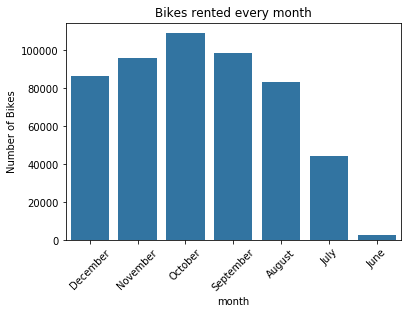

In [25]:
#create horizontal bar chart
base_color = sb.color_palette()[0]
sb.countplot(data=df , x='month', color=base_color )
plt.xticks(rotation=45)
plt.ylabel('Number of Bikes')
plt.title('Bikes rented every month');

Throught the year:
People like to rent bikes during the month of **October** the most. Over 100000 bikes were rented during this month.
<br>Top 3 months of the year for rentals:
1. October 
2. September
3. November

Based on the given data - People hardly use bikes in June. 

**Question 2: Is weekend the most busy day for rentals?**

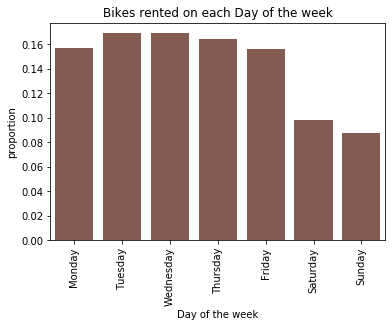

In [26]:
#generate proportion
n_points = df.shape[0]
max_count = df['start_day_week'].value_counts().max()
max_prop = max_count/n_points

#generate tick mark location and names 
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#Order the weekdays 
level_order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['start_day_week'] = df['start_day_week'].astype(ordered_cat)

#create plot
base_color = sb.color_palette()[5]
sb.countplot(data=df, x ='start_day_week', color=base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.xlabel('Day of the week')
plt.title('Bikes rented on each Day of the week')
plt.xticks(rotation = 90);


Looks like the bikes are rented during the weekdays, If I had to guess - bikes are used to commute to the work place. 

**Question 3: How long the bikes are rented?**

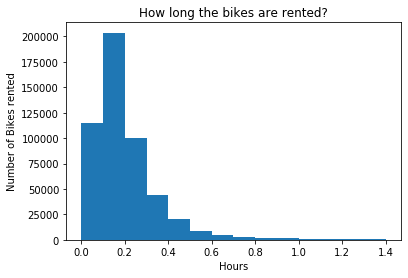

In [27]:
# w = 2
# bins_list = np.ceil((df.duration_hours.max() - df.duration_hours.min())/w)
bin_edge = np.arange(0, 1.5, 0.1)
plt.hist(data=df, x='duration_hours', bins=bin_edge)
plt.xlabel('Hours')
plt.ylabel('Number of Bikes rented')
plt.title('How long the bikes are rented?');

Mostly, bikes are rented for around 12 mintues or 0.2 hour

**Question 4: Do the subscribers rent more than the non-subscribers?** 

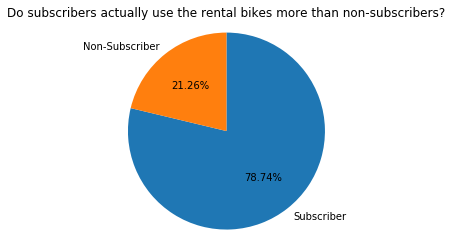

In [28]:
#Change the 'customer' to 'non-Subscriber' in the user_type series
df['user_type'].replace({'Customer' : 'Non-Subscriber'}, inplace = True)

#plot the pie chart
sorted_counts = df.user_type.value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle=90, autopct='%1.2f%%', counterclock = False)
plt.axis('square')
plt.title('Do subscribers actually use the rental bikes more than non-subscribers?');

The pie chart answers our question. **Subscribers** do use the rental bikes more than Non-Subscribers. Probably because of the discounts or lower rate of charges. 

**Question 5: What are the top 10 Busiest stations for Bike pickups and dropof?**

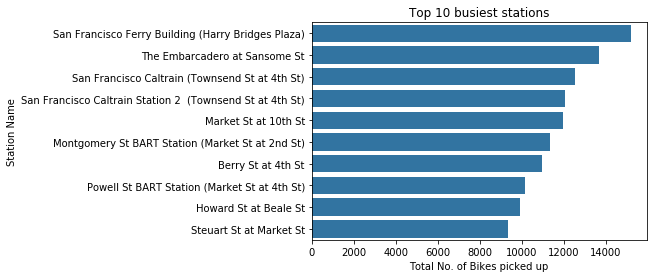

In [29]:
sb.barplot(x=df.start_station_name.value_counts()[:10].values, y=df.start_station_name.value_counts()[:10].index, color=sb.color_palette()[0] )
plt.xlabel('Total No. of Bikes picked up')
plt.ylabel('Station Name')
plt.title('Top 10 busiest stations for pick up');

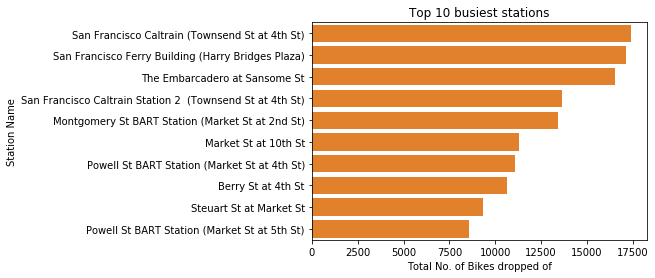

In [30]:
sb.barplot(x=df.end_station_name.value_counts()[:10].values, y=df.end_station_name.value_counts()[:10].index, color=sb.color_palette()[1] )
plt.xlabel('Total No. of Bikes dropped off')
plt.ylabel('Station Name')
plt.title('Top 10 busiest stations drop off');

As we can tell by looking at the horizontal bar charts, the top 5 stations for bike pick up and drop points are the same but they have different number of bikes involved. 

### Bivariate Exploration of Data

**Question 6: What is the relation in duration of bike usage for Subscribers and Non-Subcribers?**

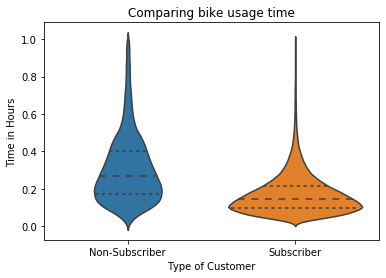

In [31]:
sb.violinplot(data = df[df.duration_hours < 1], x=df.user_type , y='duration_hours', inner="quartile")
plt.xlabel('Type of Customer')
plt.ylabel('Time in Hours')
plt.title('Comparing bike usage time');

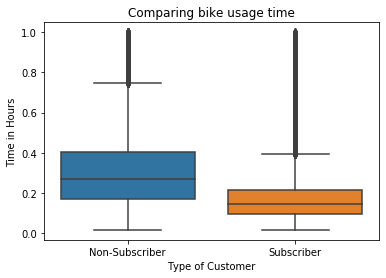

In [32]:
sb.boxplot(data = df[df.duration_hours < 1], x=df.user_type , y='duration_hours')
plt.xlabel('Type of Customer')
plt.ylabel('Time in Hours')
plt.title('Comparing bike usage time');

Since there are more subscribers we see the trend of more rental bike usage by them but, it is interesting to see Non-Subscribers usually use the bike for longer period over subscribers. I am assuming they use bike for leisure unlike the subscribers who usually use them for communting to work place. 

**Question 7: Do Non-Subscribers usually rent the bike on weekends?** 

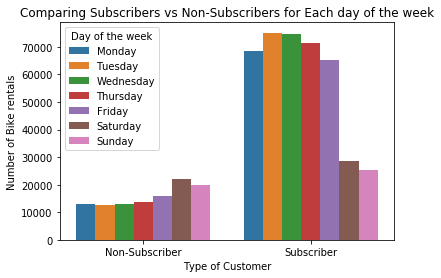

In [33]:
sb.countplot(data=df, x='user_type',hue='start_day_week')
plt.xlabel('Type of Customer')
plt.ylabel('Number of Bike rentals')
plt.title('Comparing Subscribers vs Non-Subscribers for Each day of the week')
plt.legend(title = 'Day of the week');

The amount of bike rented for **subscribers is higher for weekdays** over weekends. <br>
The amount of bike rented for **non-subscribers is higher for weekend** over weekdays.

**Question 8: How many bikes are rented each month for less than 10 minutes?** 

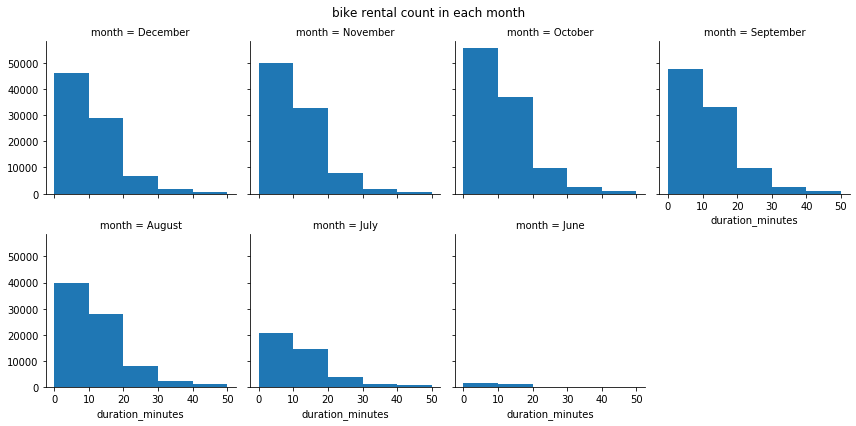

In [60]:
bin_edge = np.arange(0, 60, 10)
g = sb.FacetGrid(data=df, col='month', col_wrap=4)
g.map(plt.hist,'duration_minutes', bins =bin_edge)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('bike rental count in each month');

October had the most number of rentals which we found previously.The Faceting shows us - it also holds the record for most  10 minutes rentals followed by November and September. 

### Multivariate Exploration of Data

**Question 9: Display the combination of - the days of the week for each type of user to visualize the bike rental duration**

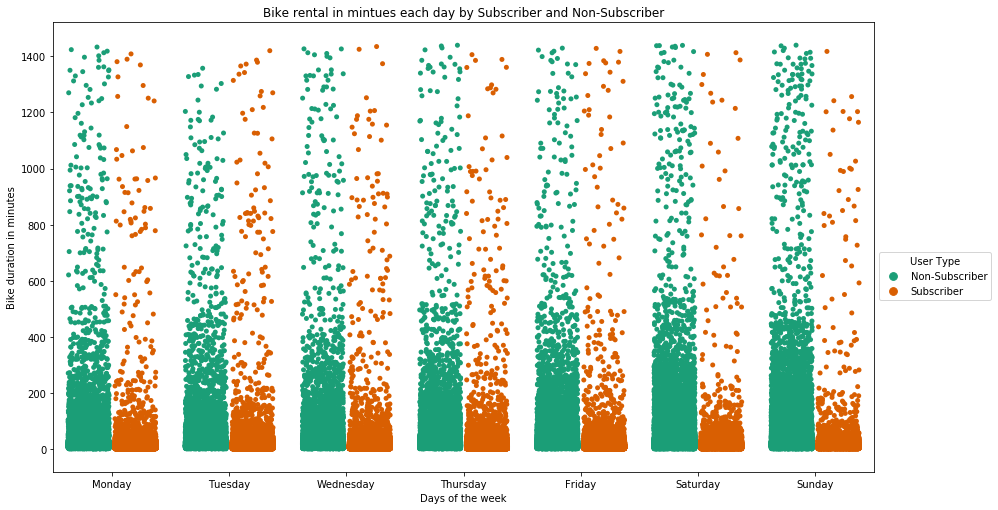

In [38]:
# scatterplot - duration and day - by user type
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data = df, x = 'start_day_week', y = 'duration_minutes', hue = 'user_type',
            jitter = 0.35, dodge = True, palette='Dark2')
plt.ylabel('Bike duration in minutes')
plt.xlabel('Days of the week')
plt.legend(title='User Type', bbox_to_anchor=(1,0.5))
plt.title('Bike rental in mintues each day by Subscriber and Non-Subscriber');

Up to 100 mintues per day - Both user types are heavily utilizing the bike rentals but it fades away slowly reaching to a mark of 1400 mintues which is not very usual.

## Insights: 

**Based on our findings we have confirmed that out that Subscribers tend to use the bikes on weekdays for their communting due to high traffic in San-Francisco. The Non-Subscribers use the bikes mostly on weekends probably as a leisure activity.** 

**The Autumn season is the most popular for renting bikes because the weather is pleasant.**

**Some stations like Caltrain, Ferry Building and Embarcadero are popluar spots for bike rentals.**